### Programa em Python para calcular e plotar os gráficos de evolução do consumo de energia por Setor

<span style="margin-right: 3em;"></span>Para cada setor será utilizado as seguintes equações para fazer a projeção:


1. DemTC=KTEP  ou 10<sup>6</sup> tep <span style="margin-right: 60px;"></span> 20/100 Ntc=0,2 <span style="margin-right: 60px;"></span> TC (Veículos Transporte de carga)
  
2. DemT(DIESEL)=0,05 * EL <span style="margin-right: 60px;"></span> 30/100 Ntc=0,3 <span style="margin-right: 60px;"></span> TD(Central termelétrica diesel)  
  
3. DemT(HFO)=0,95 * EL <span style="margin-right: 60px;"></span> 39/100 Ntc=0,39 <span style="margin-right: 60px;"></span> EL(Eletricidade) TH(Central HFO)  
4. DemTP=KTEP ou 10<sup>6</sup> tep <span style="margin-right: 60px;"></span> 15/100 Ntc=0,15 <span style="margin-right: 60px;"></span> TP(Transporte de passageiros) 
5. Energia Total = DemTC/Ntc + DemTD/Ntc+ DemTH/Ntc + DemTP/Ntc

<span style="margin-right: 3em;"></span>Assim, de forma que o programa funcione de forma correta, é feito a preparação do ambiente usando `pip` para instalar as bibliotecas python que serão usados no programa:

In [1]:
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 2.5 MB/s eta 0:00:004.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<span style="margin-right: 3em;"></span>Para os cálculos de projeção de demanda de energia de cada setor, serão utilizado com base os anos de 2020 a 2022. Será utilizado também o cálculo de taxa de crescimento simples, em que *Taxa de crescimento = ([Valor Final - Valor Inicial] / Valor Inicial) * 100*. Será calculado os valores entre 2020 e 2021 e entre 2021 e 2022 e posteriormente tirar a média entre os dois valores resultantes. E é feito uma função em que vai receber os valores da taxa de crescimento e do valor final de 2022 e vai criar um gráfico para demonstrar a projeção da demanda de energia.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def taxa_de_crescimento(valor_inicial, valor_final):
    return ((valor_final - valor_inicial)/valor_inicial)*100

def media_simples(valores):
    return sum(valores)/len(valores)

def graph_demanda(titulo, demTC_final, mediaTaxas):
    anos = list(range(2023, 2031))
    demanda_energia_aux = demTC_final
    demanda_energia = []
    
    for i in range(len(anos)):
        demanda_energia_aux = demanda_energia_aux + (demanda_energia_aux * (mediaTaxas/100))
        demanda_energia.append(demanda_energia_aux)
    
    dados = {
        'Ano': anos,
        'Demanda Energetica': demanda_energia
    }
    
    df = pd.DataFrame(dados)
    
    plt.figure(figsize=(10,6))
    
    for demanda in df.columns[1:]:
        plt.plot(df['Ano'], df[demanda], marker='o', label=demanda)
    
    plt.title(f'Evolução da Demanda por Energia Setor {titulo}')
    plt.xlabel('Ano')
    plt.ylabel('Demanda de Energia (em Ktep)')
    plt.legend
    plt.grid(True)
    
    plt.show()

### Setor de Veículos de Transporte de Carga

<span style="margin-right: 3em;"></span>Os cálculos de projeção são produzidos de acordo com os valores resutantes dos cálculos encima dos seguintes valores.

<span style="margin-right: 3em;"></span>Para 2020 e 2021: (Valores em Ktep)

In [11]:
demTC_inicial = 37953.5/0.2
demTC_final = 41443.2/0.2

taxa_20_21 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2020 e 2021: {taxa_20_21}")

Taxa de crescimento entre 2020 e 2021: 9.194672428102795


<span style="margin-right: 3em;"></span>Para 2021 e 2022: (Valores em Ktep)

In [12]:
demTC_inicial = 41443.2/0.2
demTC_final = 42600.7/0.2

taxa_21_22 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2021 e 2022: {taxa_21_22}")

Taxa de crescimento entre 2021 e 2022: 2.79297930661725


<span style="margin-right: 3em;"></span>Agora, é feito a média entre as taxas e aplicadas em projeção de demanda de energia a partir do ano 2023 até 2030, que será apresentado em gráfico.

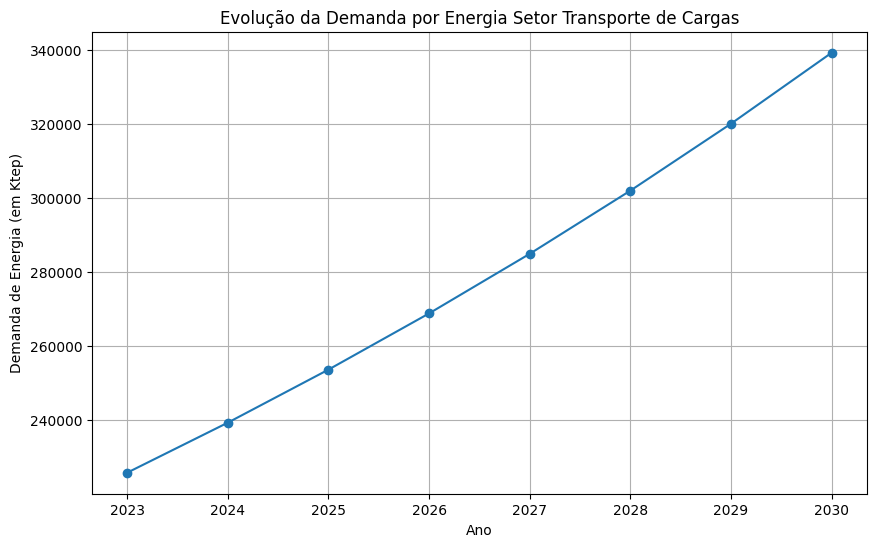

In [13]:
taxas = [taxa_20_21, taxa_21_22]
mediaTaxas = media_simples(taxas)

graph_demanda("Transporte de Cargas", demTC_final, mediaTaxas)

### Setor de Central Termelétrica Diesel

<span style="margin-right: 3em;"></span>Os cálculos de projeção são produzidos de acordo com os valores resutantes dos cálculos encima dos seguintes valores.

<span style="margin-right: 3em;"></span>Para 2020 e 2021: (Valores em Ktep)

In [26]:
demTC_inicial = (47100*(0.05))/0.3
demTC_final = (49300*(0.05))/0.3

taxa_20_21 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2020 e 2021: {taxa_20_21}")

Taxa de crescimento entre 2020 e 2021: 4.670912951167744


<span style="margin-right: 3em;"></span>Para 2021 e 2022: (Valores em Ktep)

In [27]:
demTC_inicial = (49300*(0.05))/0.3
demTC_final = (50400*(0.05))/0.3

taxa_21_22 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2021 e 2022: {taxa_21_22}")

Taxa de crescimento entre 2021 e 2022: 2.2312373225151982


<span style="margin-right: 3em;"></span>Agora, é feito a média entre as taxas e aplicadas em projeção de demanda de energia a partir do ano 2023 até 2030, que será apresentado em gráfico.

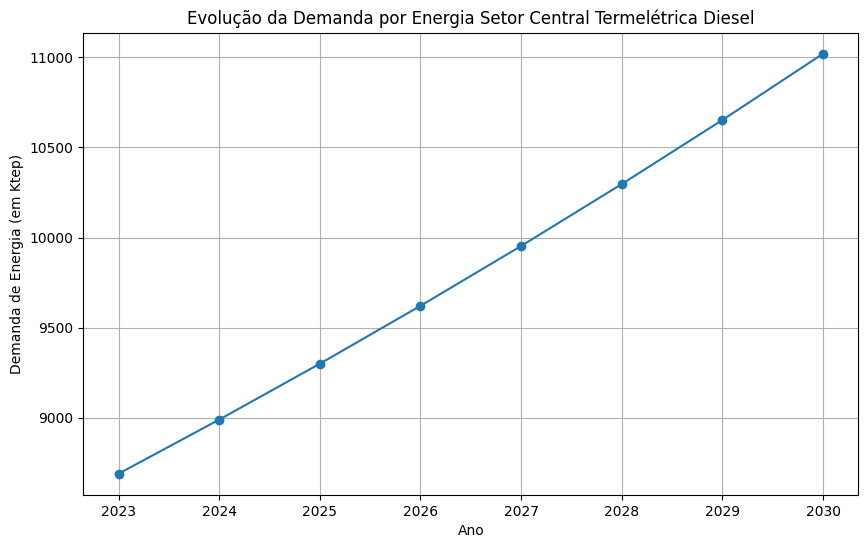

In [28]:
taxas = [taxa_20_21, taxa_21_22]
mediaTaxas = media_simples(taxas)

graph_demanda("Central Termelétrica Diesel", demTC_final, mediaTaxas)

### Setor de Central HFO

<span style="margin-right: 3em;"></span>Os cálculos de projeção são produzidos de acordo com os valores resutantes dos cálculos encima dos seguintes valores.

<span style="margin-right: 3em;"></span>Para 2020 e 2021: (Valores em Ktep)

In [29]:
demTC_inicial = (47100*(0.95))/0.39
demTC_final = (49300*(0.95))/0.39

taxa_20_21 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2020 e 2021: {taxa_20_21}")

Taxa de crescimento entre 2020 e 2021: 4.670912951167729


<span style="margin-right: 3em;"></span>Para 2021 e 2022: (Valores em Ktep)

In [30]:
demTC_inicial = (49300*(0.95))/0.39
demTC_final = (50400*(0.95))/0.39

taxa_21_22 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2021 e 2022: {taxa_21_22}")

Taxa de crescimento entre 2021 e 2022: 2.2312373225152196


<span style="margin-right: 3em;"></span>Agora, é feito a média entre as taxas e aplicadas em projeção de demanda de energia a partir do ano 2023 até 2030, que será apresentado em gráfico.

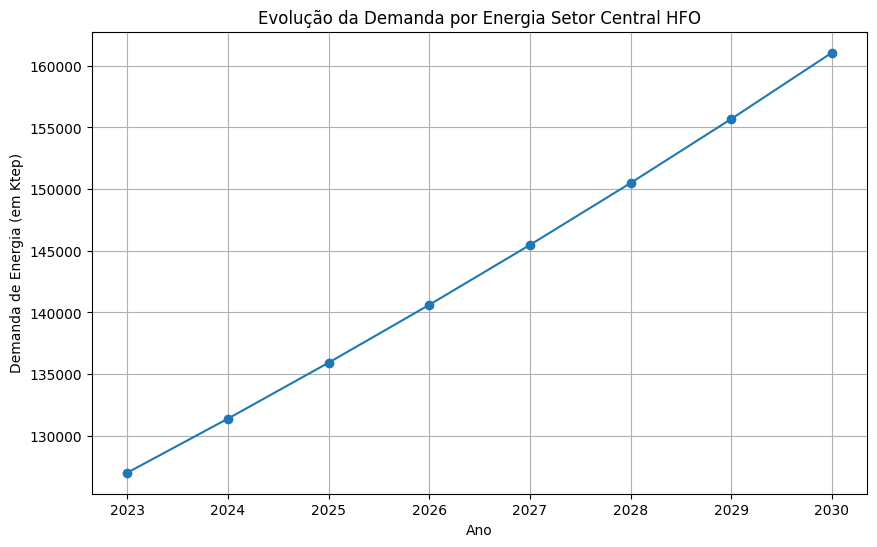

In [31]:
taxas = [taxa_20_21, taxa_21_22]
mediaTaxas = media_simples(taxas)

graph_demanda("Central HFO", demTC_final, mediaTaxas)

### Setor de Central Transporte de Passageiros

<span style="margin-right: 3em;"></span>Os cálculos de projeção são produzidos de acordo com os valores resutantes dos cálculos encima dos seguintes valores.

<span style="margin-right: 3em;"></span>Para 2020 e 2021: (Valores em Ktep)

In [33]:
demTC_inicial = 35473.7/0.15
demTC_final = 36939.9/0.15

taxa_20_21 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2020 e 2021: {taxa_20_21}")

Taxa de crescimento entre 2020 e 2021: 4.1332029080699435


<span style="margin-right: 3em;"></span>Para 2021 e 2022: (Valores em Ktep)

In [34]:
demTC_inicial = 36939.9/0.15
demTC_final = 39347.8/0.15

taxa_21_22 = taxa_de_crescimento(demTC_inicial, demTC_final)
print(f"Taxa de crescimento entre 2021 e 2022: {taxa_21_22}")

Taxa de crescimento entre 2021 e 2022: 6.518425875543785


<span style="margin-right: 3em;"></span>Agora, é feito a média entre as taxas e aplicadas em projeção de demanda de energia a partir do ano 2023 até 2030, que será apresentado em gráfico.

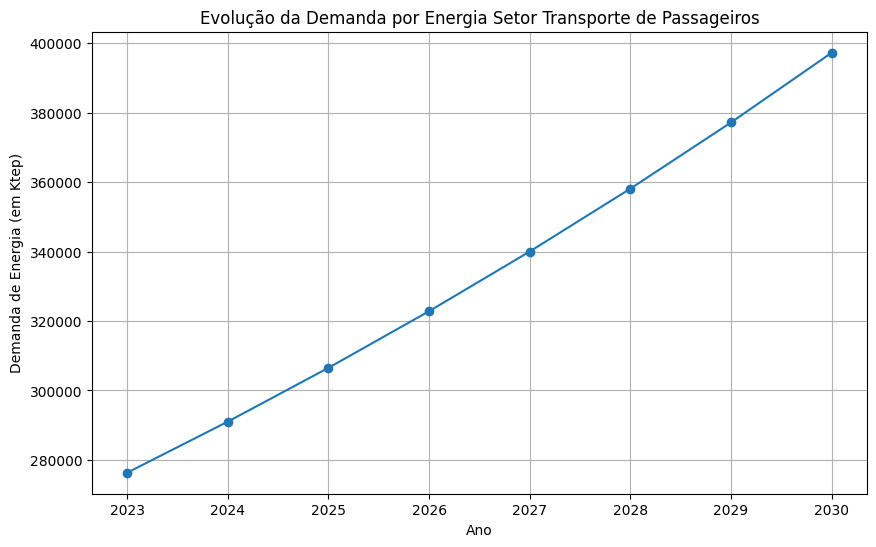

In [35]:
taxas = [taxa_20_21, taxa_21_22]
mediaTaxas = media_simples(taxas)

graph_demanda("Transporte de Passageiros", demTC_final, mediaTaxas)